#**ID3**

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
from math import log2
from graphviz import Digraph

# Dataset
data = pd.DataFrame({
    "Pendapatan": ["Rendah", "Sedang", "Tinggi", "Sedang", "Tinggi", "Rendah", "Rendah", "Rendah", "Tinggi", "Sedang", "Tinggi", "Tinggi", "Tinggi"],
    "Penerima Raskin": ["Tidak", "Ya", "Tidak", "Ya", "Tidak", "Ya", "Tidak", "Tidak", "Ya", "Tidak", "Tidak", "Tidak", "Ya"],
    "Penerima BLT": ["Tidak", "Tidak", "Tidak", "Tidak", "Tidak", "Tidak", "Tidak", "Tidak", "Tidak", "Tidak", "Tidak", "Tidak", "Ya"],
    "Peserta BPJS": ["Ya", "Ya", "Ya", "Ya", "Tidak", "Tidak", "Ya", "Tidak", "Ya", "Tidak", "Ya", "Tidak", "Ya"],
    "Kesejahteraan": ["Tidak Sejahtera", "Tidak Sejahtera", "Sejahtera", "Tidak Sejahtera", "Sejahtera", "Tidak Sejahtera",
                      "Tidak Sejahtera", "Tidak Sejahtera", "Sejahtera", "Sejahtera", "Sejahtera", "Sejahtera", "Sejahtera"]
})

fitur = list(data.columns[:-1])  # Semua kolom kecuali kolom target

print("\n\t\tDATASET")
print(data)

# Fungsi entropy dan info_gain
def entropy(data):
    total = len(data)
    counts = Counter(data).values()
    return -sum((c/total) * log2(c/total) for c in counts)

def info_gain(data, fitur, target):
    total_entropy = entropy(data[target])
    values = data[fitur].unique()

    weighted_entropy = 0
    entropy_per_value = {}

    for val in values:
        subset = data[data[fitur] == val][target]
        ent = entropy(subset)
        entropy_per_value[val] = ent
        weighted_entropy += (len(subset) / len(data)) * ent

    gain = total_entropy - weighted_entropy

    print(f"\nPerhitungan Entropy untuk '{fitur}':")
    for val, ent in entropy_per_value.items():
        print(f"  -> Entropy({val}) = {ent:.4f}")
    print(f"  -> Total Entropy setelah Split = {weighted_entropy:.4f}")
    print(f"  -> Information Gain = {gain:.4f}")

    return gain

# Fungsi ID3
def id3(data, target, fitur, graph, parent=None, edge_label="", itr=0):
    if len(set(data[target])) == 1:
        label = list(set(data[target]))[0]
        node_id = f"Leaf_{label}_{np.random.randint(1000)}"
        graph.node(node_id, label=f"{label}\n({len(data)} data)", shape="ellipse", style="filled", fillcolor="lightgreen" if "Sejahtera" in label else "lightcoral")
        if parent:
            graph.edge(parent, node_id, label=edge_label)
        return label

    if len(fitur) == 0:
        majority_label = data[target].mode()[0]
        node_id = f"Leaf_{majority_label}_{np.random.randint(1000)}"
        graph.node(node_id, label=f"{majority_label}\n({len(data)} data)", shape="ellipse", style="filled", fillcolor="lightgreen" if "Sejahtera" in majority_label else "lightcoral")
        if parent:
            graph.edge(parent, node_id, label=edge_label)
        return majority_label

    print("\n" + "="*50)
    print(f"Iterasi {itr+1}:")

    gains = {feature: info_gain(data, feature, target) for feature in fitur}
    best_feature = max(gains, key=gains.get)
    print("\nFitur dengan Gain Maksimal:", best_feature, f"(Gain: {gains[best_feature]:.4f})")
    print("="*50)

    node_id = f"Node_{best_feature}_{np.random.randint(1000)}"
    graph.node(node_id, label=f"{best_feature}\n(Gain: {gains[best_feature]:.4f})", shape="box", style="filled", fillcolor="lightblue")
    if parent:
        graph.edge(parent, node_id, label=edge_label)

    remaining_fitur = [f for f in fitur if f != best_feature]

    for val in data[best_feature].unique():
        subset = data[data[best_feature] == val]
        print(f"\nSubset untuk {best_feature} = {val} (Jumlah data: {len(subset)})")
        id3(subset, target, remaining_fitur, graph, node_id, edge_label=f"{best_feature} = {val}", itr=itr+1)

    return graph

# Buat Graphviz Digraph
graph = Digraph(format='png')

# Jalankan ID3
decision_tree_graph = id3(data, "Kesejahteraan", fitur, graph)

# Render pohon keputusan
decision_tree_graph.render('decision_tree_kesejahteraan', view=True)



		DATASET
   Pendapatan Penerima Raskin Penerima BLT Peserta BPJS    Kesejahteraan
0      Rendah           Tidak        Tidak           Ya  Tidak Sejahtera
1      Sedang              Ya        Tidak           Ya  Tidak Sejahtera
2      Tinggi           Tidak        Tidak           Ya        Sejahtera
3      Sedang              Ya        Tidak           Ya  Tidak Sejahtera
4      Tinggi           Tidak        Tidak        Tidak        Sejahtera
5      Rendah              Ya        Tidak        Tidak  Tidak Sejahtera
6      Rendah           Tidak        Tidak           Ya  Tidak Sejahtera
7      Rendah           Tidak        Tidak        Tidak  Tidak Sejahtera
8      Tinggi              Ya        Tidak           Ya        Sejahtera
9      Sedang           Tidak        Tidak        Tidak        Sejahtera
10     Tinggi           Tidak        Tidak           Ya        Sejahtera
11     Tinggi           Tidak        Tidak        Tidak        Sejahtera
12     Tinggi              Ya           

'decision_tree_kesejahteraan.png'

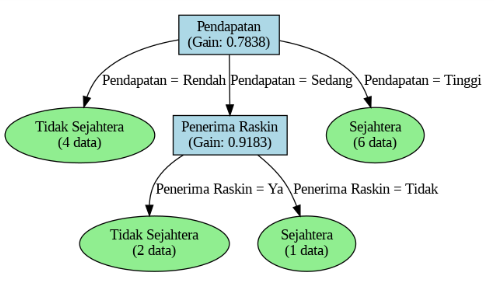

#**CART**

Gini Index Awal (S): 0.4970

Perhitungan Gini Index untuk 'Pendapatan':
  ➜ Gini(Rendah): 0.0000
  ➜ Gini(Sedang): 0.4444
  ➜ Gini(Tinggi): 0.0000
  ➜ Total Gini setelah Split: 0.1026
  ➜ Information Gain (Gini): 0.3945

Perhitungan Gini Index untuk 'Penerima Raskin':
  ➜ Gini(Tidak): 0.4688
  ➜ Gini(Ya): 0.4800
  ➜ Total Gini setelah Split: 0.4731
  ➜ Information Gain (Gini): 0.0240

Perhitungan Gini Index untuk 'Penerima BLT':
  ➜ Gini(Tidak): 0.5000
  ➜ Gini(Ya): 0.0000
  ➜ Total Gini setelah Split: 0.4615
  ➜ Information Gain (Gini): 0.0355

Perhitungan Gini Index untuk 'Peserta BPJS':
  ➜ Gini(Tidak): 0.4800
  ➜ Gini(Ya): 0.5000
  ➜ Total Gini setelah Split: 0.4923
  ➜ Information Gain (Gini): 0.0047

Atribut dengan Information Gain (Gini) Tertinggi: 'Pendapatan'


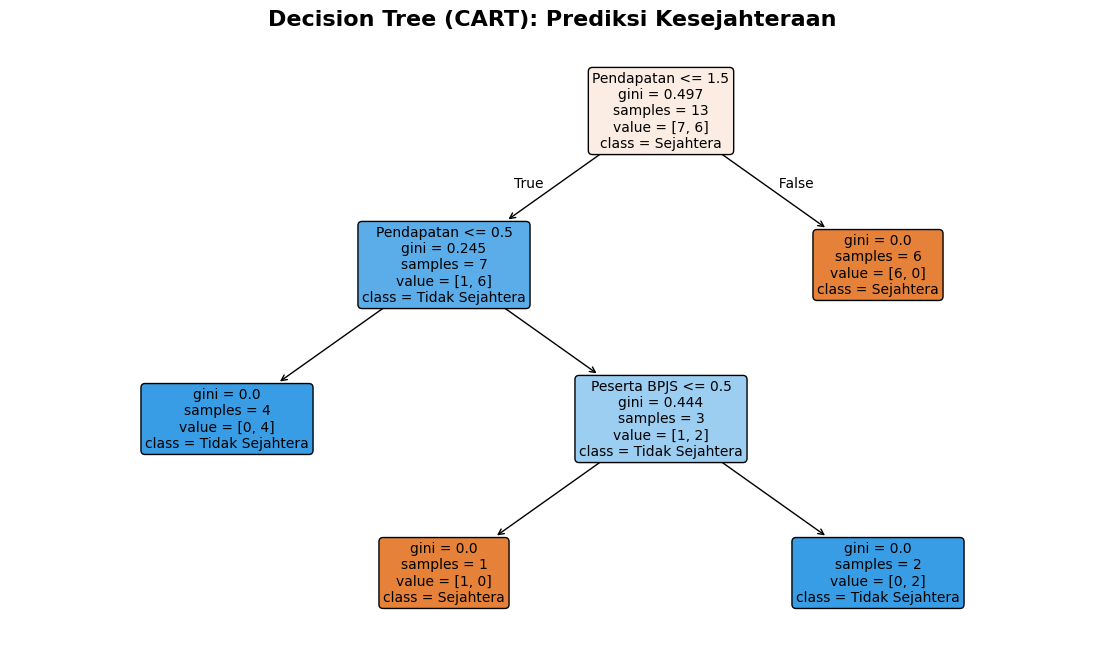

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# 1. Membuat DataFrame berdasarkan data kesejahteraan
data = {
    "Pendapatan": ["Rendah", "Sedang", "Tinggi", "Sedang", "Tinggi", "Rendah", "Rendah",
                   "Rendah", "Tinggi", "Sedang", "Tinggi", "Tinggi", "Tinggi"],
    "Penerima Raskin": ["Tidak", "Ya", "Tidak", "Ya", "Tidak", "Ya", "Tidak",
                        "Tidak", "Ya", "Tidak", "Tidak", "Tidak", "Ya"],
    "Penerima BLT": ["Tidak"] * 12 + ["Ya"],
    "Peserta BPJS": ["Ya", "Ya", "Ya", "Ya", "Tidak", "Tidak", "Ya",
                     "Tidak", "Ya", "Tidak", "Ya", "Tidak", "Ya"],
    "Kesejahteraan": ["Tidak Sejahtera", "Tidak Sejahtera", "Sejahtera", "Tidak Sejahtera",
                      "Sejahtera", "Tidak Sejahtera", "Tidak Sejahtera", "Tidak Sejahtera",
                      "Sejahtera", "Sejahtera", "Sejahtera", "Sejahtera", "Sejahtera"]
}

df = pd.DataFrame(data)
df

# 2. Fungsi untuk menghitung Entropy
def entropy(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# 3. Encoding data kategorikal ke numerik
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. Memisahkan fitur dan target
X = df.drop(columns=["Kesejahteraan"])
y = df["Kesejahteraan"]

# 5. Jika ingin menghitung impurity menggunakan Gini index
def gini_index(y):
    counts = np.bincount(y)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

# Contoh penghitungan Gini index awal
initial_gini = gini_index(y)
print(f"Gini Index Awal (S): {initial_gini:.4f}")

# 6. Fungsi perhitungan information gain dengan Gini
def information_gain_gini(feature_index, feature_name, X_subset, y_subset):
    feature_values = np.unique(X_subset.iloc[:, feature_index])
    weighted_gini = 0

    print(f"\nPerhitungan Gini Index untuk '{feature_name}':")
    for value in feature_values:
        subset_y = y_subset[X_subset.iloc[:, feature_index] == value]
        subset_gini = gini_index(subset_y)
        weighted_gini += (len(subset_y) / len(y_subset)) * subset_gini

        original_value = label_encoders[feature_name].inverse_transform([value])[0]
        print(f"  ➜ Gini({original_value}): {subset_gini:.4f}")

    gain = gini_index(y_subset) - weighted_gini
    print(f"  ➜ Total Gini setelah Split: {weighted_gini:.4f}")
    print(f"  ➜ Information Gain (Gini): {gain:.4f}")

    return gain

# 7. Menghitung IG dengan Gini untuk semua atribut
gains = {}
for i, feature_name in enumerate(X.columns):
    gains[feature_name] = information_gain_gini(i, feature_name, X, y)

# 8. Menentukan atribut terbaik berdasarkan Gini
best_feature = max(gains, key=gains.get)
print(f"\nAtribut dengan Information Gain (Gini) Tertinggi: '{best_feature}'")

# 9. Membuat model Decision Tree dengan criterion 'gini' (CART)
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X, y)

# 10. Visualisasi decision tree
plt.figure(figsize=(14, 8))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=label_encoders["Kesejahteraan"].classes_,
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree (CART): Prediksi Kesejahteraan", fontsize=16, fontweight="bold")
plt.gca().set_facecolor('#f0f0f0')
plt.show()


# **Confusion Matrix**


Confusion Matrix untuk CART:


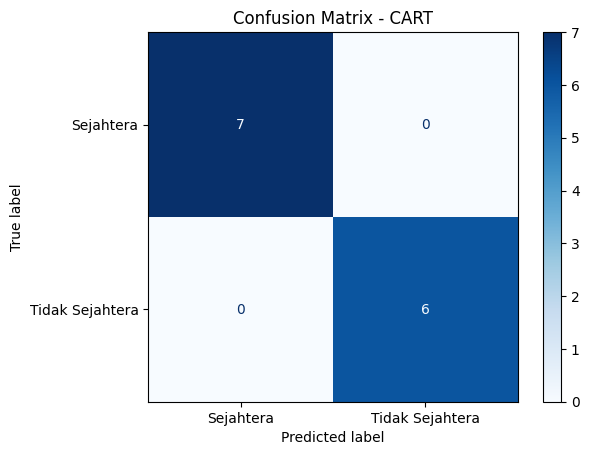

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi data training
y_pred_cart = dt_model.predict(X)

# Confusion Matrix untuk CART
cm_cart = confusion_matrix(y, y_pred_cart)
disp_cart = ConfusionMatrixDisplay(confusion_matrix=cm_cart,
                                   display_labels=label_encoders["Kesejahteraan"].classes_)
print("\nConfusion Matrix untuk CART:")
disp_cart.plot(cmap="Blues")
plt.title("Confusion Matrix - CART")
plt.show()
